# Initial Data Exploration and Pre-processing

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df= pd.read_csv('CarPrice_Assignment.csv')

In [106]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [107]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [108]:
df.dtypes
#all of the data types seem to be in place. We will anyway be excluding car_ID and change the data type of symboling to object

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [109]:
df.apply(lambda x: sum(x.isnull()))
#there are no null values in the data. Data seems to be fully filled

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [110]:
#Splitting the Company name out of the car name and storing it under car company
df['car_company']=df['CarName'].str.split(' ', 1).str[0]

In [111]:
df.car_company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
maxda           2
renault         2
vw              2
toyouta         1
porcshce        1
mercury         1
Nissan          1
vokswagen       1
Name: car_company, dtype: int64

In [112]:
#looking at value counts of all uniques in object data type variables
categorical_columns= [x for x in df.dtypes.index if df.dtypes[x]== 'object']
for col in categorical_columns:
    print ('\nfrequency of categories for variable %s'%col)
    print (df[col].value_counts())


frequency of categories for variable CarName
toyota corolla               6
peugeot 504                  6
toyota corona                6
subaru dl                    4
mazda 626                    3
toyota mark ii               3
honda civic                  3
mitsubishi outlander         3
mitsubishi g4                3
mitsubishi mirage g4         3
mazda glc deluxe             2
volvo 264gl                  2
peugeot 604sl                2
nissan latio                 2
honda civic cvcc             2
isuzu D-Max                  2
volvo 145e (sw)              2
bmw x3                       2
mazda rx-7 gs                2
volkswagen dasher            2
mazda rx-4                   2
bmw 320i                     2
volvo 244dl                  2
saab 99gle                   2
honda accord                 2
toyota starlet               2
saab 99le                    2
toyota corolla 1200          2
volvo 144ea                  2
toyota corolla liftback      2
                        

In [113]:
#It is clear that car company has many names with different spellings.All of these need to be mapped to a single cleaned name.
df['car_company']= df['car_company'].map({'toyota': 'toyota','nissan': 'nissan', 'mazda': 'mazda', 'mitsubishi': 'mitsubishi', 'honda': 'honda', 'subaru': 'subaru', 'peugeot': 'peugeot', 'volvo': 'volvo', 'dodge': 'dodge', 'volkswagen': 'volkswagen', 'buick': 'buick', 'bmw': 'bmw', 'plymouth': 'plymouth', 'audi': 'audi', 'saab': 'saab', 'isuzu': 'isuzu', 'porsche': 'porsche', 'jaguar': 'jaguar', 'alfa-romero': 'alfa-romero', 'chevrolet': 'chevrolet', 'renault': 'renault', 'mercury': 'mercury', 'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen', 'vw': 'volkswagen', 'porcshce': 'porsche'})
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

# Exploratory data analysis

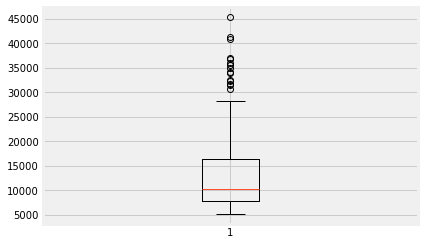

In [114]:
plt.boxplot(df['price']);
#higher values are quite possible as the data contains a mix of high end cars as well. let us further inspect this by looking at the mean prices of all car companies

In [115]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [116]:
df_company_grouping= df.groupby(['car_company']).mean()

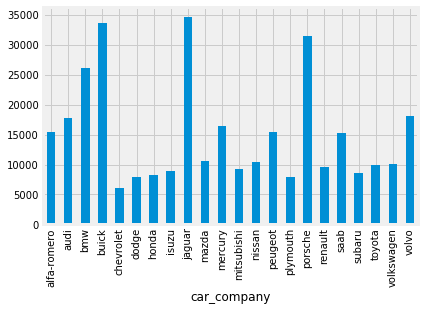

In [117]:
df_company_grouping['price'].plot.bar()

In [118]:
#High end cars clearly show a higher value in price. There aren't any outliers in the data.
import statsmodels.formula.api as smf

In [119]:
#changing dtype of symboling to object
df['symboling']= df['symboling'].astype(str)
df.dtypes

car_ID                int64
symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
car_company          object
dtype: object

In [120]:
df.drop(['car_ID', 'CarName'],axis=1,inplace=True)
df.dtypes

symboling            object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
car_company          object
dtype: object

In [121]:
df.dtypes

symboling            object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
car_company          object
dtype: object

# Model Fitting and Validation

In [ ]:
#Model Fitting
columns_selected = "+".join(df.columns.difference(["price"]))
my_formula = "price ~ " + columns_selected
my_formula
lm_fit = smf.ols(formula = my_formula, data=df).fit()

In [123]:
print(lm_fit.rsquared)
lm_fit.summary()

0.966788596826


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     63.68
Date:                Fri, 11 Aug 2017   Prob (F-statistic):           1.05e-78
Time:                        21:26:07   Log-Likelihood:                -1783.5
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     140   BIC:                             3913.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.751e+04   1.06e+04     -1.645      0.102   -3.86e+04    3535.218
aspiration[T.turbo]        1572.2936    872.292      1.802      0.074    -152.274    3296.861
car_company[T.audi]         852.9004   2348.109      0.363      0.717   -3789.437    5495.238
car_company[T.bmw]         5232.8489   2336.798      2.239      0.027     612.873    9852.825
car_company[T.buick]       2384.3090   2570.314      0.928      0.355   -2697.341    7465.959
car_company[T.chevrolet]  -4908.9789   2252.961     -2.179      0.031   -9363.203    -454.754
car_company[T.dodge]      -5631.4543   1867.420     -3.016      0.003   -9323.443   -1939.465
car_company[T.honda]      -2780.3625   2180.798     -1.275      0.204   -7091.917    1531.192
car_company[T.isuzu]      -3223.4968   2048.865     -1.573      0.118   -7274.212     827.218
car_company[T.jaguar]     -1898.7436   2843.770     -0.668      0.505   -7521.030    3723.542
car_company[T.mazda]      -2814.3229   1711.673     -1.644      0.102   -6198.392     569.746
car_company[T.mercury]    -4470.3891   2984.906     -1.498      0.136   -1.04e+04    1430.930
car_company[T.mitsubishi] -5799.1786   1882.666     -3.080      0.002   -9521.310   -2077.047
car_company[T.nissan]     -3084.2375   1686.295     -1.829      0.070   -6418.132     249.657
car_company[T.peugeot]    -5266.7904   1908.936     -2.759      0.007   -9040.859   -1492.722
car_company[T.plymouth]   -5567.5908   1859.548     -2.994      0.003   -9244.017   -1891.165
car_company[T.porsche]     3140.7644   2969.782      1.058      0.292   -2730.655    9012.184
car_company[T.renault]    -3840.3193   2280.452     -1.684      0.094   -8348.895     668.257
car_company[T.saab]        1218.5720   2116.793      0.576      0.566   -2966.441    5403.585
car_company[T.subaru]     -5045.7491   1657.565     -3.044      0.003   -8322.844   -1768.654
car_company[T.toyota]     -3671.5677   1576.159     -2.329      0.021   -6787.719    -555.416
car_company[T.volkswagen] -2141.8431   1833.610     -1.168      0.245   -5766.988    1483.302
car_company[T.volvo]      -1962.2771   2317.235     -0.847      0.399   -6543.575    2619.020
carbody[T.hardtop]        -2391.2279   1236.698     -1.934      0.055   -4836.247      53.791
carbody[T.hatchback]      -3133.5350   1118.451     -2.802      0.006   -5344.773    -922.297
carbody[T.sedan]          -2553.7198   1210.958     -2.109      0.037   -4947.848    -159.591
carbody[T.wagon]          -2878.9931   1305.266     -2.206      0.029   -5459.574    -298.412
cylindernumber[T.five]    -5339.8371   2861.803     -1.866      0.064    -1.1e+04     318.102
cylindernumber[T.four]    -1964.5219   3548.307     -0.554      0.581   -8979.715    5050.671
cylindernumber[T.six]     -2569.8148   2705.151     -0.950      0.344   -79

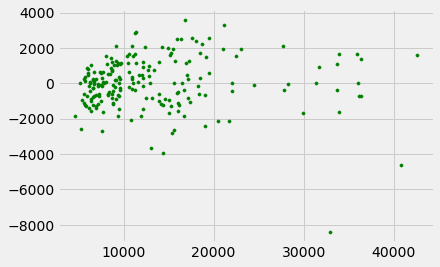

In [124]:
#Plotting residuals
plt.style.use('fivethirtyeight')
plt.scatter(lm_fit.predict(), lm_fit.predict() - df['price'],
            color = "green", s = 10, label = 'Residual plot')

In [125]:
#Lets Exculde the varibales that are affecting the price least based on p and t values from the stats summary
#So the model is actually best explained by the features except the ones excluded below.
columns_selected = "+".join(df.columns.difference(["price", "drivewheel", "enginetype", "fuelsystem", "symboling", "citympg", "horsepower", "boreratio","compressionratio","highwaympg","stroke","fueltype","cylindernumber","doornumber"]))
my_formula = "price ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=df).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     98.82
Date:                Fri, 11 Aug 2017   Prob (F-statistic):           7.86e-95
Time:                        21:26:08   Log-Likelihood:                -1821.6
No. Observations:                 205   AIC:                             3713.
Df Residuals:                     170   BIC:                             3829.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -3.748e+04   1.34e+04     -2.804      0.006   -6.39e+04   -1.11e+04
aspiration[T.turbo]        1288.6785    481.827      2.675      0.008     337.543    2239.814
car_company[T.audi]         -97.5405   1681.433     -0.058      0.954   -3416.717    3221.636
car_company[T.bmw]         7645.7862   1551.333      4.929      0.000    4583.428    1.07e+04
car_company[T.buick]       5400.1668   1762.791      3.063      0.003    1920.388    8879.946
car_company[T.chevrolet]  -1783.1805   1813.138     -0.983      0.327   -5362.346    1795.985
car_company[T.dodge]      -4297.7945   1544.769     -2.782      0.006   -7347.194   -1248.395
car_company[T.honda]      -3330.6879   1525.868     -2.183      0.030   -6342.778    -318.598
car_company[T.isuzu]      -1987.9525   1658.497     -1.199      0.232   -5261.853    1285.948
car_company[T.jaguar]      1899.5429   2042.299      0.930      0.354   -2131.989    5931.075
car_company[T.mazda]       -878.8282   1437.616     -0.611      0.542   -3716.706    1959.049
car_company[T.mercury]    -2245.4077   2456.083     -0.914      0.362   -7093.756    2602.941
car_company[T.mitsubishi] -4826.2632   1448.799     -3.331      0.001   -7686.216   -1966.310
car_company[T.nissan]     -2732.4834   1405.804     -1.944      0.054   -5507.564      42.597
car_company[T.peugeot]    -3768.5779   1697.174     -2.221      0.028   -7118.827    -418.329
car_company[T.plymouth]   -4178.9614   1545.518     -2.704      0.008   -7229.840   -1128.083
car_company[T.porsche]     3566.0646   2140.246      1.666      0.098    -658.817    7790.946
car_company[T.renault]    -4055.7049   1925.950     -2.106      0.037   -7857.563    -253.847
car_company[T.saab]        1421.4521   1683.697      0.844      0.400   -1902.195    4745.099
car_company[T.subaru]     -2712.1647   1452.116     -1.868      0.064   -5578.666     154.337
car_company[T.toyota]     -2721.3759   1360.312     -2.001      0.047   -5406.655     -36.097
car_company[T.volkswagen] -2217.4819   1475.032     -1.503      0.135   -5129.219     694.256
car_company[T.volvo]      -1121.7868   1610.263     -0.697      0.487   -4300.474    2056.900
carbody[T.hardtop]        -2831.0122   1178.128     -2.403      0.017   -5156.657    -505.367
carbody[T.hatchback]      -3111.4904   1043.560     -2.982      0.003   -5171.495   -1051.486
carbody[T.sedan]          -2420.9691   1084.870     -2.232      0.027   -4562.521    -279.418
carbody[T.wagon]          -2513.7427   1217.925     -2.064      0.041   -4917.947    -109.539
enginelocation[T.rear]     1.108e+04   2147.587      5.158      0.000    6838.527    1.53e+04
carheight                  -263.3927    120.283     -2.190      0.030    -500.834     -25.951
carlength                  -125.6347     46.076     -2.727      0.007    -2

In [126]:
#Further excluding car company to see how it affects the accuracy. Also, all the below features are now important in deciding the price exclusive of car company
columns_selected = "+".join(df.columns.difference(["price", "drivewheel", "enginetype", "fuelsystem", "symboling", "citympg", "horsepower", "boreratio","compressionratio","highwaympg","stroke","fueltype","cylindernumber","doornumber","car_company","aspiration","carheight"]))
my_formula = "price ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=df).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     120.5
Date:                Fri, 11 Aug 2017   Prob (F-statistic):           3.66e-80
Time:                        21:26:08   Log-Likelihood:                -1921.1
No. Observations:                 205   AIC:                             3866.
Df Residuals:                     193   BIC:                             3906.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.799e+04   1.16e+04     -5.877      0.000   -9.08e+04   -4.52e+04
carbody[T.hardtop]     -3347.7441   1666.472     -2.009      0.046   -6634.579     -60.909
carbody[T.hatchback]   -4093.7355   1357.064     -3.017      0.003   -6770.316   -1417.155
carbody[T.sedan]       -3103.0276   1399.725     -2.217      0.028   -5863.749    -342.306
carbody[T.wagon]       -5118.9697   1502.441     -3.407      0.001   -8082.281   -2155.658
enginelocation[T.rear]  1.354e+04   2074.376      6.526      0.000    9445.457    1.76e+04
carlength                -96.4634     49.158     -1.962      0.051    -193.419       0.492
carwidth                 779.9606    224.819      3.469      0.001     336.543    1223.379
curbweight                 4.9981      1.346      3.714      0.000       2.344       7.652
enginesize                84.5243     10.900      7.754      0.000      63.026     106.023
peakrpm                    1.9858      0.482      4.120      0.000       1.035       2.937
wheelbase                165.8255     82.104      2.020      0.045       3.889     327.762
==============================================================================
Omnibus:                       54.066   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.429
Skew:                           1.028   Prob(JB):                     3.29e-41
Kurtosis:                       7.196   Cond. No.                     3.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

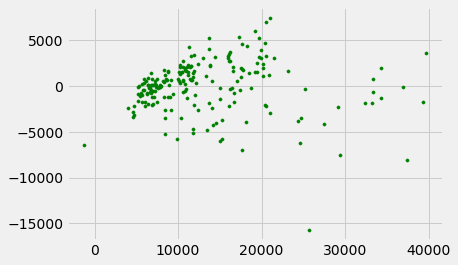

In [127]:
plt.style.use('fivethirtyeight')
plt.scatter(lm_fit1.predict(), lm_fit1.predict() - df['price'],
            color = "green", s = 10, label = 'Residual plot')

In [128]:
#The most important features that explain more than 95% of the model are- 'aspiration','car_company','carbody','enginelocation','carheight','carlength','carwidth','curbweight','enginesize','peakrpm','wheelbase'

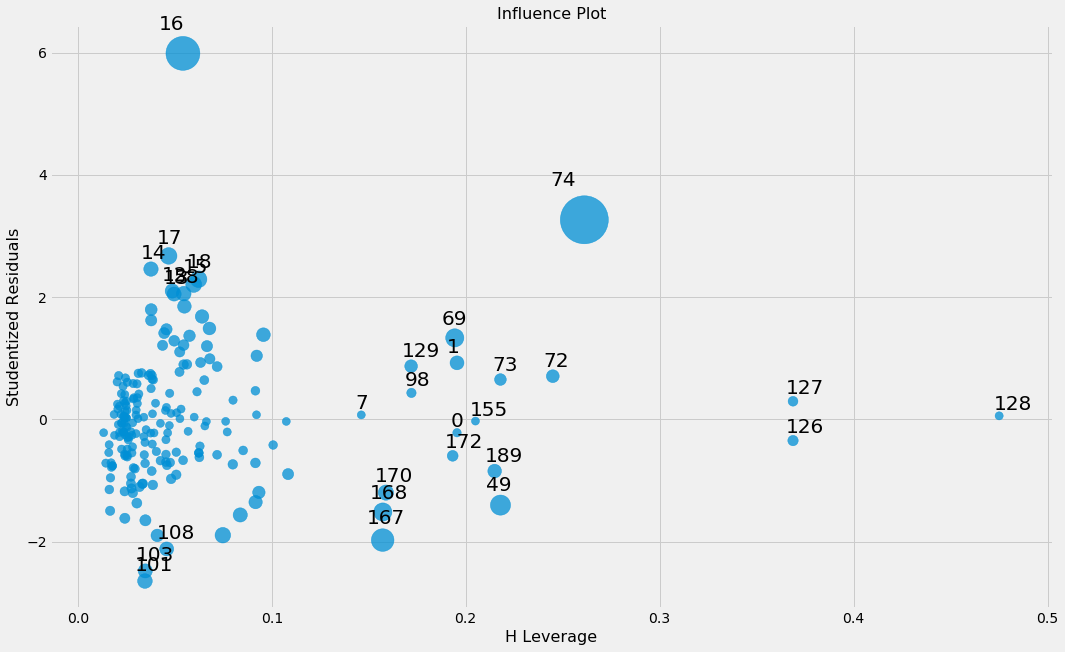

In [129]:
#Looking at the influencial plot to see if there are any troublesome points in the data
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(16,10))
fig = sm.graphics.influence_plot(lm_fit1, alpha  = 0.05, ax = ax, criterion="cooks")

In [131]:
#Dropping the troublesome points from the data set
df.drop([16,74],inplace=True)

In [132]:
#Further excluding car company to see how it affects the accuracy. Also, all the below features are now important in deciding the price exclusive of car company
columns_selected = "+".join(df.columns.difference(["price", "drivewheel", "enginetype", "fuelsystem", "symboling", "citympg", "horsepower", "boreratio","compressionratio","highwaympg","stroke","fueltype","cylindernumber","doornumber","car_company","aspiration","carheight","wheelbase"]))
my_formula = "price ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=df).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     141.9
Date:                Fri, 11 Aug 2017   Prob (F-statistic):           4.81e-83
Time:                        21:26:13   Log-Likelihood:                -1881.3
No. Observations:                 203   AIC:                             3785.
Df Residuals:                     192   BIC:                             3821.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.429e+04   1.05e+04     -6.125      0.000    -8.5e+04   -4.36e+04
carbody[T.hardtop]     -3951.4720   1506.384     -2.623      0.009   -6922.658    -980.287
carbody[T.hatchback]   -3506.1203   1192.338     -2.941      0.004   -5857.883   -1154.357
carbody[T.sedan]       -2269.0799   1210.254     -1.875      0.062   -4656.180     118.020
carbody[T.wagon]       -4344.8321   1302.630     -3.335      0.001   -6914.135   -1775.529
enginelocation[T.rear]  1.501e+04   1887.539      7.950      0.000    1.13e+04    1.87e+04
carlength                -82.6336     40.478     -2.041      0.043    -162.473      -2.794
carwidth                 949.6593    197.245      4.815      0.000     560.615    1338.704
curbweight                 6.4461      1.232      5.230      0.000       4.015       8.877
enginesize                62.7455     10.262      6.114      0.000      42.504      82.987
peakrpm                    1.4648      0.423      3.460      0.001       0.630       2.300
==============================================================================
Omnibus:                       14.793   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.107
Skew:                           0.531   Prob(JB):                     0.000117
Kurtosis:                       4.006   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


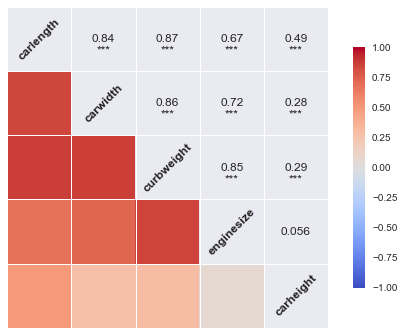

In [135]:
#Checking for correlations among few variables as there might exist a correlation between weight and other attributes of the car.
#there are a series of plots and in each step correlated variables have been removed
import seaborn as sns
import seaborn.linearmodels as lt
plt.savefig('attribute_correlations.png', tight_layout=True)
lt.corrplot(df[['carlength','carwidth','curbweight','enginesize','carheight']])

C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


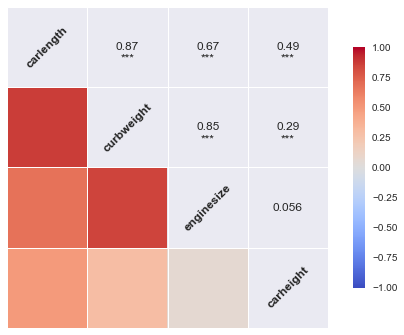

In [136]:
import seaborn as sns
import seaborn.linearmodels as lt
plt.savefig('attribute_correlations.png', tight_layout=True)
lt.corrplot(df[['carlength','curbweight','enginesize','carheight']])

C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Bewo Technologies\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


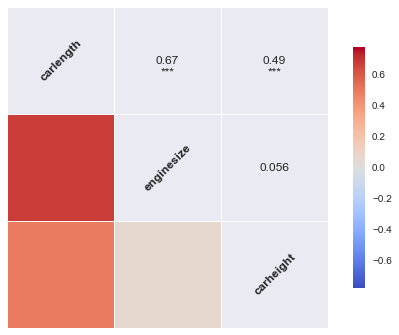

In [137]:
import seaborn as sns
import seaborn.linearmodels as lt
plt.savefig('attribute_correlations.png', tight_layout=True)
lt.corrplot(df[['carlength','enginesize','carheight']])

# Final Model 

In [140]:
#Further excluding car company to see how it affects the accuracy. Also, all the below features are now important in deciding the price exclusive of car company
columns_selected = "+".join(df.columns.difference(["price", "drivewheel", "enginetype", "fuelsystem", "symboling", "citympg", "horsepower", "boreratio","compressionratio","highwaympg","stroke","fueltype","cylindernumber","doornumber","car_company","aspiration","wheelbase","carwidth","curbweight","carheight"]))
my_formula = "price ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=df).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     121.5
Date:                Fri, 11 Aug 2017   Prob (F-statistic):           2.71e-71
Time:                        21:53:23   Log-Likelihood:                -1915.2
No. Observations:                 203   AIC:                             3848.
Df Residuals:                     194   BIC:                             3878.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.086e+04   5308.553     -7.697      0.000   -5.13e+04   -3.04e+04
carbody[T.hardtop]     -5183.0783   1749.078     -2.963      0.003   -8632.728   -1733.429
carbody[T.hatchback]   -3731.9772   1380.380     -2.704      0.007   -6454.457   -1009.498
carbody[T.sedan]       -3700.9990   1386.194     -2.670      0.008   -6434.944    -967.054
carbody[T.wagon]       -5306.0601   1525.496     -3.478      0.001   -8314.747   -2297.373
enginelocation[T.rear]  1.286e+04   2196.954      5.852      0.000    8523.759    1.72e+04
carlength                192.9135     29.475      6.545      0.000     134.780     251.047
enginesize               117.7860      8.538     13.796      0.000     100.947     134.625
peakrpm                    1.7887      0.495      3.614      0.000       0.813       2.765
==============================================================================
Omnibus:                       11.720   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.255
Skew:                           0.527   Prob(JB):                      0.00218
Kurtosis:                       3.580   Cond. No.                     1.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Most Important Features in deciding the price

In [ ]:
# Important features in deciding pricing excluding car company are- 'carbody','enginelocation','carlength','enginesize','peakrpm','wheelbase'